# Comparative Central Bank Policy Rates

Focus on policy rates since Mid 2021.
We do this by hand because the BIS data can be very late.

## Python set-up

In [1]:
# system imports
from pathlib import Path
from io import StringIO

# analytic imports
import pandas as pd
import matplotlib.pyplot as plt
from plotting import (
    finalise_plot,
    set_chart_dir,
)

# plotting stuff
plt.style.use("fivethirtyeight")

# Where to put the charts
CHART_DIR = "./charts/Other"
Path(CHART_DIR).mkdir(parents=True, exist_ok=True)
set_chart_dir(CHART_DIR)

## Data

In [2]:
au = pd.read_csv(
    StringIO(
        """Date,Rate,Change
    2021-09-01,0.1,
    2022-05-04,0.35,0.25
    2022-06-08,0.85,0.5
    2022-07-06,1.35,0.5
    2022-08-03,1.85,0.5
    2022-09-07,2.35,0.5
    2022-10-05,2.6,0.25
    2022-11-02,2.85,0.25
    2022-12-07,3.1,0.25
    2023-02-07,3.35,0.25
    2023-03-07,3.6,0.25"""
    ),
    header=0,
    index_col="Date",
    parse_dates=True,
)

euro = pd.read_csv(
    StringIO(
        """Date,Rate,Change
    2021-09-01,0.0,
    2022-07-27,0.5,0.5
    2022-09-14,1.25,0.75
    2022-11-02,2.0,0.75
    2022-12-21,2.5,0.5
    2023-02-08,3.0,0.5"""
    ),
    header=0,
    index_col="Date",
    parse_dates=True,
)

us = pd.read_csv(
    # mid-point of target range
    StringIO(
        """Date,Rate,Change
    2021-09-01,0.125,
    2022-03-17,0.375,0.25
    2022-05-05,0.875,0.5
    2022-06-16,1.625,0.75
    2022-07-28,2.375,0.75
    2022-09-22,3.125,0.75
    2022-11-03,3.875,0.75
    2022-12-15,4.375,0.5
    2023-02-02,4.625,0.25"""
    ),
    header=0,
    index_col="Date",
    parse_dates=True,
)

ca = pd.read_csv(
    StringIO(
        """Date,Rate,Change
    2021-09-01,0.25,
    2022-03-03,0.5,0.25
    2022-04-14,1.0,0.5
    2022-06-02,1.5,0.5
    2022-07-14,2.5,1.0
    2022-09-08,3.25,0.75
    2022-10-27,3.75,0.5
    2022-12-08,4.25,0.5
    2023-01-26,4.5,0.25"""
    ),
    header=0,
    index_col="Date",
    parse_dates=True,
)

nz = pd.read_csv(
    StringIO(
        """Date,Rate,Change
    2021-09-01,0.25,
    2021-10-07,0.5,0.25
    2021-11-25,0.75,0.25
    2022-02-24,1.0,0.25
    2022-04-14,1.5,0.5
    2022-05-26,2.0,0.5
    2022-07-14,2.5,0.5
    2022-08-18,3.0,0.5
    2022-10-06,3.5,0.5
    2022-11-24,4.25,0.75
    2023-02-22,4.75,0.5"""
    ),
    header=0,
    index_col="Date",
    parse_dates=True,
)

uk = pd.read_csv(
    StringIO(
        """Date,Rate,Change
    2021-09-01,0.1,
    2021-12-16,0.25,0.15
    2022-02-03,0.5,0.25
    2022-03-17,0.75,0.25
    2022-05-05,1.0,0.25
    2022-06-16,1.25,0.25
    2022-08-04,1.75,0.5
    2022-09-22,2.25,0.5
    2022-11-03,3.0,0.75
    2022-12-15,3.5,0.5
    2023-02-02,4.0,0.5"""
    ),
    header=0,
    index_col="Date",
    parse_dates=True,
)

dataset = {
    "Australia": [au, "Au"],
    "Canada": [ca, "Ca"],
    "Euro area": [euro, "EU"],
    "New Zealand": [nz, "NZ"],
    "United Kingdom": [uk, "UK"],
    "United States": [us, "US"],
}

## Data integrity checks

In [3]:
START_DATE = "2021-09-01"
today = pd.Timestamp((pd.Timestamp("today").date()))

for name, (frame, abbr) in dataset.items():
    assert frame.index[0] == pd.Timestamp(START_DATE), f" Check {name}"
    assert frame.index[-1] <= today, f" Check {name}"
    assert frame.index.is_monotonic_increasing, f" Check {name}"
    assert frame.index.is_unique, f" Check {name}"
    assert (abs(frame["Rate"].diff() - frame["Change"]) < 0.000001)[
        1:
    ].all(), f" Check {name}"

## Plot

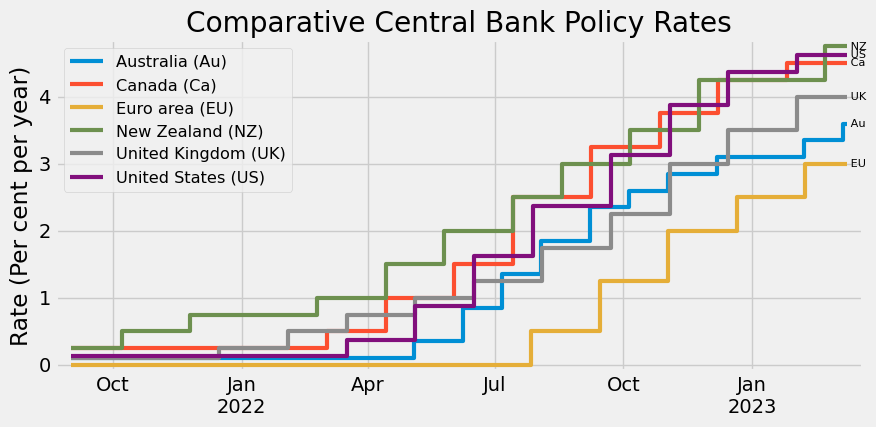

In [4]:
# bring up to date ...
fig, ax = plt.subplots()

for name, (frame, abbr) in dataset.items():
    series = frame["Rate"].copy()
    if series.index[-1] < today:
        series.at[today] = series.iloc[-1]
    series.index = pd.PeriodIndex(series.index, freq="D")
    series.plot(drawstyle="steps-post", lw=3, ax=ax, label=f"{name} ({abbr})")
    ax.text(
        x=series.index[-1],
        y=series.iloc[-1],
        s=f" {abbr}",
        ha="left",
        va="center",
        fontsize="xx-small",
    )

ax.legend(loc="best", fontsize="small")
finalise_plot(
    ax,
    title="Comparative Central Bank Policy Rates",
    ylabel="Rate (Per cent per year)",
    show=True,
)

## Finished

In [5]:
print("done")

done
